In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import functions as myTSEB
import numpy as np

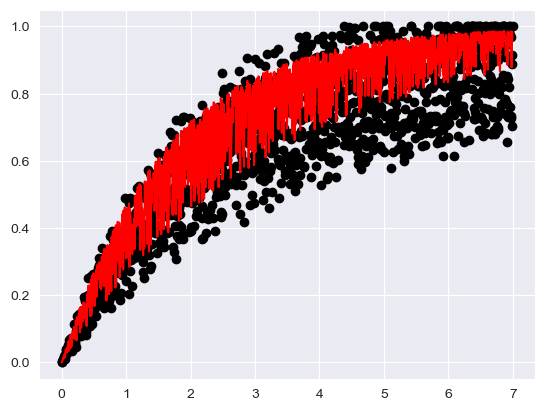

In [36]:
LAI = np.arange(0, 7, 0.005)
# print(LAI)
rng = np.random.default_rng()
# fv = rng.uniform(-0.25, 0.1, size=len(LAI))
fv = rng.uniform(0.7, 1.1, size=len(LAI))
x_LAD = rng.uniform(0.5, 1.5, size=len(LAI))
# print(fv)

K_be = myTSEB.estimate_Kbe(x_LAD, 0)
fv01 = 1 - np.exp(-0.2 * LAI)
fv02 = 1 - np.exp(-K_be * LAI)
fv03 = 1 - np.exp(-1.5 * LAI)

scale = lambda x: np.clip(x * fv, 0, 1)

fv = list(map(scale, [fv01, fv02, fv03]))

# fv = np.clip(rng.uniform(0.8, 1.2), 0, 1)

plt.scatter(LAI, fv[1], color='black')
plt.plot(LAI, fv02, color='r')
# plt.scatter(LAI, fv03, color='blue')
plt.show()

(178, 23)
Index(['LAI', 'fv', 'h_V', 'row_sep', 'x_LAD', 'leaf_width', 'Trad', 'Tair',
       'Sdn', 'u', 'P_atm', 'ea', 'sza_degrees', 'saa_degrees', 'row_azimuth',
       'LE_V', 'LE_S', 'f_theta', 'Rn_V', 'Rn_S', 'Rn_V0', 'Rn_S0',
       'iteration'],
      dtype='object')


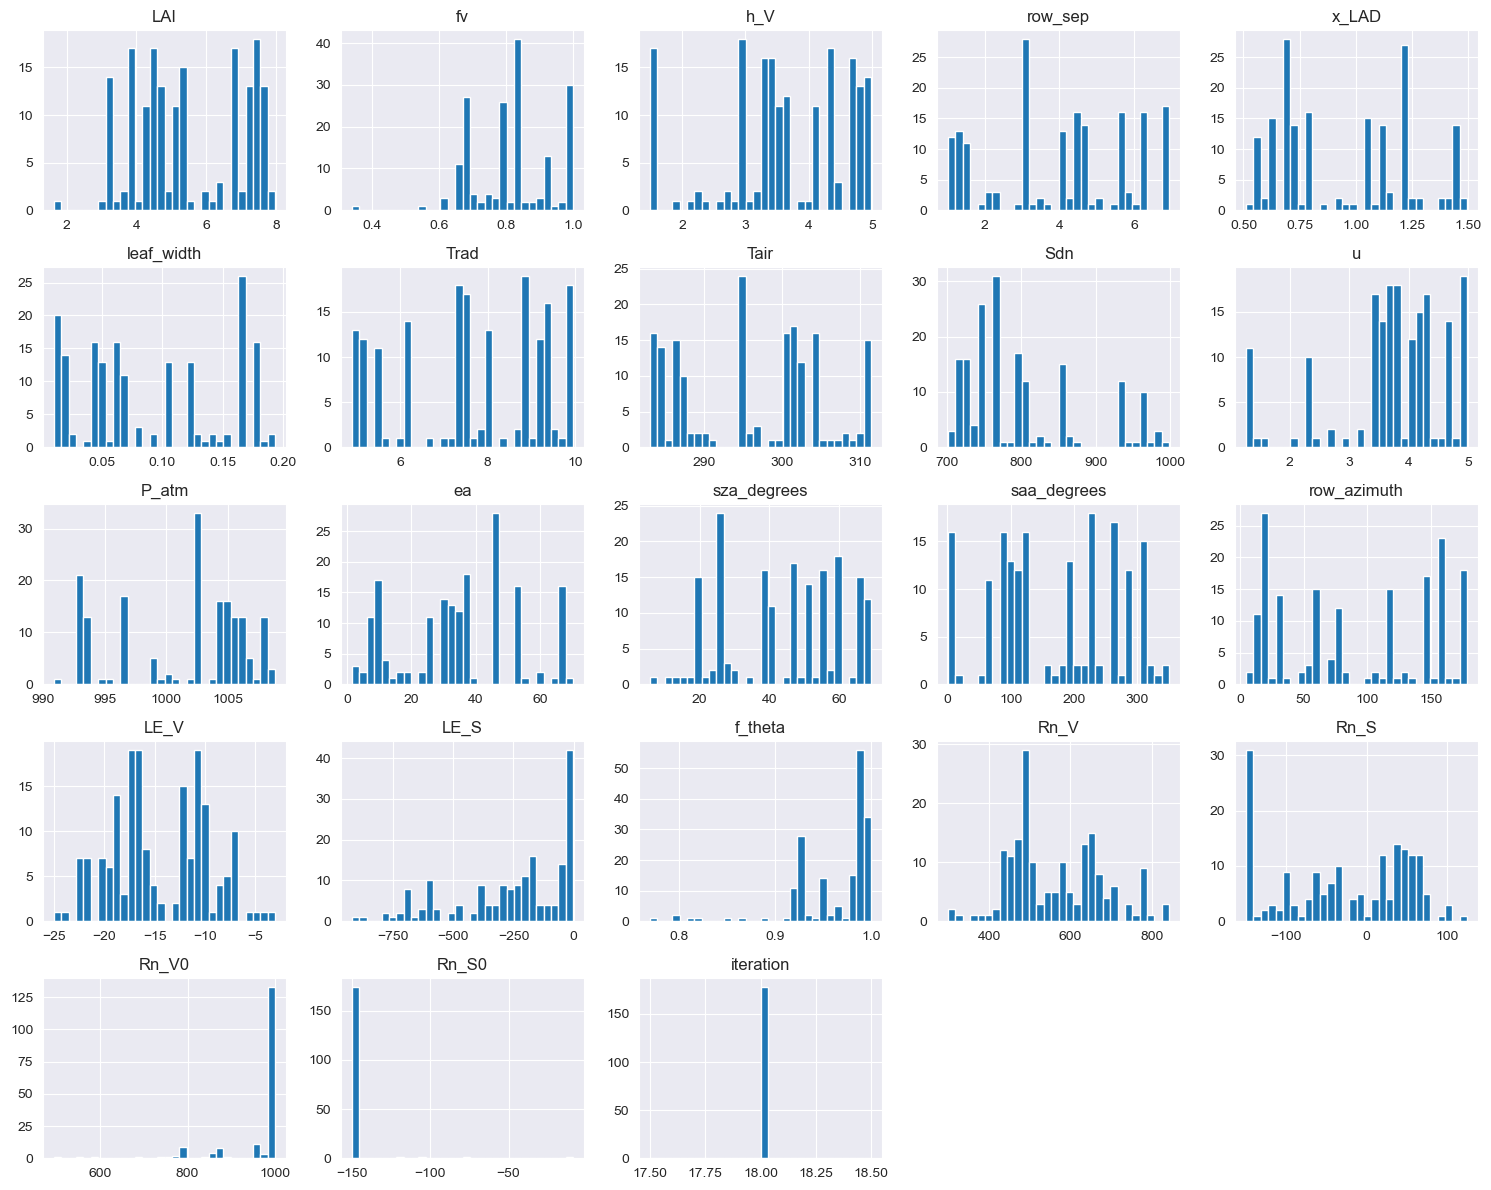

In [37]:
path = 'files/outputs_sensitivity_analysis.csv'
data = pd.read_csv(path)
data_fail = data[data.LE_S < 0]

print(data_fail.shape)
print(data_fail.columns)
# print(np.mean(data_fail.Sdn))
# print(np.mean(data_fail.Tair))

data_fail.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()
# print(np.max(data_fail.sza_degrees))
# print(data.columns)

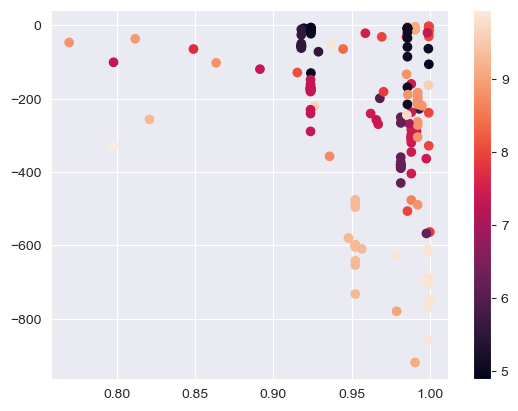

In [45]:
plt.scatter(data_fail.f_theta, data_fail.LE_S, c=data_fail.Trad)
plt.colorbar()

In [34]:
data_fail[data_fail.fv<0.4]

,LAI,fv,h_V,row_sep,x_LAD,leaf_width,Trad,Tair,Sdn,u,...,sza_degrees,saa_degrees,row_azimuth,LE_V,LE_S,Rn_V,Rn_S,Rn_V0,Rn_S0,iteration
1070,1.642578,0.33999,2.377734,3.367188,0.605469,0.034707,8.921875,304.914062,830.078125,3.222656,...,69.179688,97.03125,80.410156,-4.650294,-36.511933,328.910522,125.372621,494.409313,-105.343826,18
